## **Exploratory Data Analysis (EDA) on UK Pesticides DEFRA**  
## **Index**  

### **1. Introduction**  
#### Overview  
- [Overview of the Dataset](#overview-of-the-dataset)  
- [Objective of the EDA](#objective-of-the-eda)  

### **2. Data Loading and Initial Exploration**  
#### Data Import & Structure  
- [Importing Required Libraries](#importing-required-libraries)  
- [Loading the Dataset](#loading-the-dataset)  
- [Previewing the Dataset](#previewing-the-dataset)  
- [Dataset Shape](#dataset-shape)  
- [Data Types Overview](#data-types-overview)  
- [Basic Statistical Summary](#basic-statistical-summary)  
- [Column Descriptions](#column-descriptions)  
- [Data Dictionary](#data-dictionary)  

### **3. Data Cleaning**  
#### Handling Issues  
- [Handling Missing Values](#handling-missing-values)  
- [Removing Duplicates](#removing-duplicates)  
- [Data Type Conversion](#data-type-conversion)  
- [Outlier Detection](#outlier-detection)  

### **4. Feature Engineering**  
#### Creating & Transforming Features  
- [Creating New Features](#creating-new-features)  

### **5. Univariate Analysis**  
#### Individual Column Analysis  
- [Categorical Columns](#categorical-columns)  
- [Numerical Columns](#numerical-columns)  

### **6. Bivariate Analysis**  
#### Relationship Betwen Two Variables  
- [Categorical vs. Numerical](#categoical-vs-numerical)  
- [Numerical vs. Numerical](#numerical-vs-numerical
#### Relationship Between Multiple Variables

### **7. Multivariate Analysis**  
##
- [Time Trend of Pesticide Levels](#time-trend-of-pesticide-levels)
- [Pesticide Residue Levels Across Top 10 Retailers](#pesticid
- [Correlation Heatmap](Correlation-Heatmap)tacked Bar Charts](#stacked-bar-charts)  

### **8. Key Insights from EDA**  
#### -  Key Insihts from ED


## **1. Introduction**

<a name="1-introduction"></a>
### 1.1 Overview of the Dataset

The dataset is data from data.gov.uk with minimal processing. The processing is mainly to combine the data from multiple files across several years and extract additional information (such as location or extract pesticide details).

<a name='introduction'></a>
### 1.2 Objective of the EDA

The goal of this project is to analyze pesticide residue data to ensure food safety and compliance with regulatory standards. The dataset includes detailed information about food samples collected from various retail outlets, including pesticide levels and manufacturing details. The following key problems will be addressed:

   <b>   -  Determine which products have the highest levels of pesticide residues </b>
   
   <b>   -  Identify the most commonly detected pesticides across samples </b>

## **2. Data Loading and Initial Exploration**

<a name='data-loading-and-initial-exploration'></a>
### 2.1 Importing Required Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

we have import pandas for data Manupulation ,numpy for numeric computation ,matplotlib for data visualization,seaborn also for data visualization and warning for ignoring warning

<a name='data-loading-and-initial-exploration'></a>
### 2.2 Loading the Dataset

In [63]:
data=pd.read_csv("data/combined_df.csv")

In [64]:
data.drop(columns=['Unnamed: 0'],inplace=True)

### 2.3 Previewing the Dataset

In [65]:
data.head()

,sample_id,date_of_sampling,description,country_of_origin,retail_outlet,address,brand_name,packer_/_manufacturer_/_importer,product,address_postcode,packer_postcode,address_area,packer_area,chem_name,amount_detected,mrl,amount_pc
0,1958/2016,8/8/2016,Bramley Apples,UK,Asda,"Creechbarrow Road, Taunton TA1 2AN",Asda,"Asda Stores Ltd Leeds, UK LS11 5AD",Apple,TA1 2AN,LS11 5AD,Somerset,West Yorkshire,boscalid,0.03,2.0,0.015
1,1958/2016,8/8/2016,Bramley Apples,UK,Asda,"Creechbarrow Road, Taunton TA1 2AN",Asda,"Asda Stores Ltd Leeds, UK LS11 5AD",Apple,TA1 2AN,LS11 5AD,Somerset,West Yorkshire,pyraclostrobin,0.01,0.5,0.020
2,0230/2016,8/8/2016,Bramley Apples,UK,Co-op,"Northgate, Louth LN11 0LT",Co-op,Co-operative Group Ltd Manchester M60 0AG,Apple,LN11 0LT,M60 0AG,Lincolnshire,Greater Manchester,boscalid,0.05,2.0,0.025
3,0230/2016,8/8/2016,Bramley Apples,UK,Co-op,"Northgate, Louth LN11 0LT",Co-op,Co-operative Group Ltd Manchester M60 0AG,Apple,LN11 0LT,M60 0AG,Lincolnshire,Greater Manchester,flonicamid (sum),0.02,0.2,0.100
4,0230/2016,8/8/2016,Bramley Apples,UK,Co-op,"Northgate, Louth LN11 0LT",Co-op,Co-operative Group Ltd Manchester M60 0AG,Apple,LN11 0LT,M60 0AG,Lincolnshire,Greater Manchester,pyraclostrobin,0.03,0.5,0.060


### 2.4 Dataset Shape:

In [66]:
data.shape

(35160, 17)

### 2.5 Data Types Overview:

In [67]:
data.dtypes

sample_id                            object
date_of_sampling                     object
description                          object
country_of_origin                    object
retail_outlet                        object
address                              object
brand_name                           object
packer_/_manufacturer_/_importer     object
product                              object
address_postcode                     object
packer_postcode                      object
address_area                         object
packer_area                          object
chem_name                            object
amount_detected                     float64
mrl                                 float64
amount_pc                           float64
dtype: object

In our dataset 3 float coloumns and 15 are object

### 2.6 Basic Statistical Summary

In [68]:
data.describe()

,amount_detected,mrl,amount_pc
count,35160.000000,35160.000000,35160.000000
mean,0.278042,3.880540,0.314925
std,1.428359,11.272327,6.618040
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.020000,0.700000,0.010000
75%,0.090000,4.000000,0.060000
max,51.000000,300.000000,790.000000


####  amount_detected
- **Mean**: 0.278 (very low compared to max value 51).  
- **Standard Deviation**: 1.428 (high variation relative to the mean).  
- **Minimum Value**: 0.000 (suggesting many zero values).
- **25%** of values are **0.000**.  
- **50% (Median)** is **0.020**, indicating a highly skewed distribution.  
- **75%** is **0.090**, meaning 75% of values are still relatively small
-  **Maximum Value**: 51.000 (suggests presence of extreme outliers)

####  mrl (Maximum Residue Limit)
- **Mean**: 3.88, higher than `amount_detected`.  
- **Standard Deviation**: 11.27 (high variability).  
- **Minimum Value**: 0.000 (again suggesting some zero values).  
- **25%** of values are **0.000**.  
- **50% (Median)** is **0.700**, showing the bulk of data is small.  
- **75%** is **4.000**, which is slightly above the mean.  
- **Maximum Value**: 300.000 (extremely high, indicating possible outliers).  

#### amount_pc
- **Mean**: 0.3149 (low compared to the max).  
- **Standard Deviation**: 6.618 (very large spread).  
- **Minimum Value**: 0.000 (many zero values).  
- **25% and 50%** of values are close to **0.000**, confirming a **strong right skew**.  
- **75%** is **0.060**, still a very low value.  
- **Maximum Value**: 790.000 (huge outlier).

In [69]:
data.describe(include=['object', 'category'])

,sample_id,date_of_sampling,description,country_of_origin,retail_outlet,address,brand_name,packer_/_manufacturer_/_importer,product,address_postcode,packer_postcode,address_area,packer_area,chem_name
count,35160,35160,35160,35160,35106,35106,35106,35104,35160,35160,35160,33132,23556,35160
unique,19596,842,6678,132,1582,6670,1360,5504,320,2287,1251,59,60,207
top,3138/2020,9/6/2021,Conference Pears,UK,Tesco,"1 Ring Road, Coleraine BT52 1QP",None stated,Tesco Stores Ltd Welwyn Garden City AL7 1GA,Grapes,UB2 5XJ,0,Greater London,West Yorkshire,0
freq,25,407,590,12187,5365,262,7857,2437,1802,778,9507,3796,5681,12221


####  sample_id
- **Total Count**: 35,160  
- **Unique Values**: 19,596  
- **Most Frequent Value**: 3138/2020 (appears **25 times**)  
#### date_of_sampling
- **Total Count**: 35,160  
- **Unique Dates**: 842  
- **Most Frequent Date**: 2021-09-06 (appears **407 times**)  
#### description
- **Total Count**: 35,160  
- **Unique Values**: 6,678  
- **Most Frequent Product**: Conference Pears (590 samples)
#### country_of_origin
- **Total Count**: 35,160  
- **Unique Countries**: 132  
- **Most Frequent Country**: UK (12,187 samples)  
#### retail_outlet
- **Total Count**: 35,106  
- **Unique Outlets**: 1,582  
- **Most Frequent Outlet**: Tesco (5,365 samples)
#### address
- **Total Count**: 35,106  
- **Unique Addresses**: 6,670  
- **Most Frequent Address**:1 Ring Road, Coleraine BT52 1QP (262 samples)
#### brand_name
- **Total Count**: 35,106  
- **Unique Brands**: 1,360  
- **Most Frequent Brand**: None stated (7,857 samples)
#### packer_/_manufacturer_/_importer
- **Total Count**: 35,104  
- **Unique Entities**: 5,504  
- **Most Frequent**: Tesco Stores Ltd Welwyn Garden City AL7 1GA (2,437 samples)
#### product
- **Total Count**: 35,160  
- **Unique Products**: 320  
- **Most Frequent Product**: Grapes (1,802 samples)  
#### address_postcode
- **Total Count**: 35,160  
- **Unique Postcodes**: 2,287  
- **Most Frequent Postcode**: UB2 5XJ (778 samples)
#### packer_postcode
- **Total Count**: 35,160  
- **Unique Values**: 1,251  
- **Most Frequent Value**: 0 (9,507 times)
#### address_area
- **Total Count**: 33,132  
- **Unique Areas**: 59  
- **Most Frequent Area**: Greater London (3,796 samples)  
#### packer_area
- **Total Count**: 23,556  
- **Unique Areas**: 60  
- **Most Frequent Area**: West Yorkshire (5,681 samples)
#### chem_name
- **Total Count**: 35,160  
- **Unique Values**: 207  
- **Most Frequent Chemical**: 0 (12,221 times)  

### 2.7 Column Descriptions

In [70]:
data.columns

Index(['sample_id', 'date_of_sampling', 'description', 'country_of_origin',
       'retail_outlet', 'address', 'brand_name',
       'packer_/_manufacturer_/_importer', 'product', 'address_postcode',
       'packer_postcode', 'address_area', 'packer_area', 'chem_name',
       'amount_detected', 'mrl', 'amount_pc'],
      dtype='object')

### 2.8 **Data Dictionary**

#### **Categorical Columns**

##### **sample_id**  
- **Description:** Unique identifier for each sample.  
- **Unique Values:** 19,596 (some IDs might be reused).  

##### **date_of_sampling**  
- **Description:** Date when the sample was collected.  
- **Unique Values:** 842  
- **Most Frequent Date:** 2021-09-06 (407 times).  

##### **description**  
- **Description:** Short details about the sampled product.  
- **Unique Values:** 6,678  
- **Most Frequent Product:** Conference Pears (590 times).  

##### **country_of_origin**  
- **Description:** Country where the product is from.  
- **Unique Values:** 132  
- **Most Frequent Country:** UK (12,187 times).  

##### **retail_outlet**  
- **Description:** Store or supermarket where the sample was taken.  
- **Unique Values:** 1,582  
- **Most Frequent Outlet:** Tesco (5,365 times).  
- **Missing Values:** 54  

##### **address**  
- **Description:** Full address of the store.  
- **Unique Values:** 6,670  
- **Most Frequent Address:** Appears 262 times.  
- **Missing Values:** 54  

##### **brand_name**  
- **Description:** Brand of the product.  
- **Unique Values:** 1,360  
- **Most Frequent Brand:** "None stated" (7,857 times).  
- **Missing Values:** 54  

##### **packer_/_manufacturer_/_importer**  
- **Description:** Company that packed, made, or imported the product.  
- **Unique Values:** 5,504  
- **Most Frequent Entity:** Tesco Stores Ltd Welwyn Garden City AL7 1GA (2,437 times).  
- **Missing Values:** 56  

##### **product**  
- **Description:** Type of product (e.g., apples, potatoes).  
- **Unique Values:** 320  
- **Most Frequent Product:** Grapes (1,802 times).  

##### **address_postcode**  
- **Description:** Postal code of the store.  
- **Unique Values:** 2,287  
- **Most Frequent Postcode:** UB2 5XJ (778 times).  

##### **packer_postcode**  
- **Description:** Postal code of the packer or manufacturer.  
- **Unique Values:** 1,251  
- **Potential Issues:** 9,507 entries contain "0" (possibly missing or incorrect).  

##### **address_area**  
- **Description:** General area of the store.  
- **Unique Values:** 59  
- **Most Frequent Area:** Greater London (3,796 times).  
- **Missing Values:** 2,028  

##### **packer_area**  
- **Description:** Area related to the packer or manufacturer.  
- **Unique Values:** 60  
- **Most Frequent Area:** West Yorkshire (5,681 times).  
- **Missing Values:** 11,604  

##### **chem_name**  
- **Description:** Name of the detected chemical in the sample.  
- **Unique Values:** 207  
- **Potential Issues:** Some entries contain "0" (potential missinecified values).  
- **Most Frequent Chemical:** Appears 12,221 times.  


#### **Numerical Columns**

##### **amount_detected**  
- **Description:** Amount of pesticide detected in the sample.  
- **Mean:** 0.278042  
- **Standard Deviation (std):** 1.42835  
- **Min Value:** 0  
- **Max Value:** 51  

##### **mrl**  
- **Description:** Legal pesticide limit in food.  
- **Mean:** 3.8880  
- **Standard Deviation (std):** 11.27  
- **Min Value:** 0  
- **Max Value:** 300  

##### **amount_pc**  
- **Description:** Detected pesticide as a percentage of the MRL.  
- **Mean:** 0.3149  
- **Standard Deviation (std):** 6.61   
- **Min Value:** 0  
- **Max Value:** 790  


## **3. Data Cleaning**

Data cleaning is the process of removing errors, inconsistencies, and missing values to improve data quality for accurate analysis

### 3.1 Determine  Missing Values

Determining null values involves identifying missing or empty data points in a dataset to handle them appropriately for accurate analysis

In [72]:
data.isnull().sum()

sample_id                               0
date_of_sampling                        0
description                             0
country_of_origin                       0
retail_outlet                          54
address                                54
brand_name                             54
packer_/_manufacturer_/_importer       56
product                                 0
address_postcode                        0
packer_postcode                         0
address_area                         2028
packer_area                         11604
chem_name                               0
amount_detected                         0
mrl                                     0
amount_pc                               0
dtype: int64

we have find null values in some columns are :
* address: 54
* retail_outlet: 54
* packer_/_manufacturer_/_importer: 56
* address_area  : 2028
* packer_area : 11604

### 3.2 Handling Missing Values

In [73]:
print(data[["country_of_origin", "retail_outlet", "address_area", "packer_area"]].nunique())

country_of_origin     132
retail_outlet        1582
address_area           59
packer_area            60
dtype: int64


- We have found null values in some columns, all of which are categorical.

- For categorical columns with null values, the first approach is to replace them with the mode of the respective row. However, one issue arises: the     address column contains null values, and there are five different address-related columns in the dataset.

#### **3.2.1 Handling Missing Address Column**

In [74]:
countries = data["country_of_origin"].unique()
for country in countries:
    country_mask = data["country_of_origin"] == country
    mode_value = data.loc[country_mask, "address"].mode()
    data.loc[country_mask, "address"] = data.loc[country_mask, "address"].fillna(mode_value[0])

We handled missing values in the "address" column by grouping data by "country_of_origin" and filling null values with the most common address for each country

#### **3.2.2 Handling Missing Values in the address_area Column**

In [106]:
postcode = data["address_postcode"].unique()
for code in postcode:
    code_mask = data["address_postcode"] == code
    mode = data.loc[code_mask, "address_area"].mode()
    if not mode.empty:
        data.loc[code_mask, "address_area"] = data.loc[code_mask, "address_area"].fillna(mode_value[0])
    else:
        data.loc[code_mask, "address_area"] = data.loc[code_mask, "address_area"].fillna("unknown")

In [78]:
postcode = data["address_postcode"].unique()
print(len(postcode))

2287


We handled missing values in the "address_area" column by grouping data by "address_postcode" and filling null values with the most common address area for each postcode

#### **3.2.3 Handling Missing Values in the packer_area Column**

In [79]:
packer_code = data["packer_postcode"].unique()
for code in packer_code:
    code_mask = data["packer_postcode"] == code
    mode = data.loc[country_mask, "packer_area"].mode()
    if not mode.empty:
        data.loc[code_mask, "packer_area"] = data.loc[code_mask, "packer_area"].fillna(mode[0])
    else:
        data.loc[code_mask, "packer_area"] = data.loc[code_mask, "packer_area"].fillna("unknown")

We handled missing values in the "packer_area" column by grouping data by "packer_postcode" and filling null values with the most common packer area for each postcode

#### **3.2.3 Handling Missing Values in the "retail_outlet" Column**

In [80]:
addresses = data["address"].dropna().unique()
for address in addresses:
    address_mask = (data["address"] == address) & (data["retail_outlet"].isna())
    mode_value = data.loc[data["address"] == address, "retail_outlet"].mode()
    if not mode_value.empty:
        data.loc[address_mask, "retail_outlet"] = mode_value[0]
    else:
        data.loc[address_mask, "retail_outlet"] = "Unknown"

 We fills missing "retail_outlet" values based on the most common retail outlet for each "address"

#### **3.2.4 Handling Missing Values in brand_name column**

In [81]:
products = data["product"].dropna().unique()

for product in products:
    product_mask = (data["product"] == product) & (data["brand_name"].isna())  
    mode_value = data.loc[data["product"] == product, "brand_name"].mode()
    data.loc[product_mask, "brand_name"] = mode_value[0] if not mode_value.empty else "Unknown"

we fills Missing values in "brand_name" filled with the most common brand for each "product"

#### **3.2.5 Handling Missing Values in "packer_/manufacturer/_importer column**

In [82]:
packer_codes = data["packer_postcode"].dropna().unique()

for packer_code in packer_codes:
    mask = (data["packer_postcode"] == packer_code) & (data["packer_/_manufacturer_/_importer"].isna())
    mode_value = data.loc[data["packer_postcode"] == packer_code, "packer_/_manufacturer_/_importer"].mode()
    
    if not mode_value.empty:
        data.loc[mask, "packer_/_manufacturer_/_importer"] = mode_value[0]
    else:
        data.loc[mask, "packer_/_manufacturer_/_importer"] = "Unknown"

We Handle Missing values in "packer_/manufacturer/_importer" were filled using the most common value for each "packer_postcode"

In [83]:
data.isnull().sum()

sample_id                           0
date_of_sampling                    0
description                         0
country_of_origin                   0
retail_outlet                       0
address                             0
brand_name                          0
packer_/_manufacturer_/_importer    0
product                             0
address_postcode                    0
packer_postcode                     0
address_area                        0
packer_area                         0
chem_name                           0
amount_detected                     0
mrl                                 0
amount_pc                           0
dtype: int64

Now we have susessfully handled all null values

### 3.2 Removing Duplicates

In [84]:
data.duplicated().sum()

1233

In our dataset 1233 value are repeated so we are removing

In [85]:
data.drop_duplicates(inplace=True)

In [86]:
data.shape

(33927, 17)

### 3.4 Data Type Conversion

In [87]:
print(type(data['date_of_sampling'][0]))    

<class 'str'>


The date_of_sampling column was  a string type

In [88]:
data['year']=pd.to_datetime(data['date_of_sampling']).dt.year
data['month']=pd.to_datetime(data['date_of_sampling']).dt.month

We converted it to a datetime format for time-based analysis. After conversion
we extracted two new features:
- Year (year): The year the sample was collected.
- Month (month): The month of sample collection.

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33927 entries, 0 to 35158
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sample_id                         33927 non-null  object 
 1   date_of_sampling                  33927 non-null  object 
 2   description                       33927 non-null  object 
 3   country_of_origin                 33927 non-null  object 
 4   retail_outlet                     33927 non-null  object 
 5   address                           33927 non-null  object 
 6   brand_name                        33927 non-null  object 
 7   packer_/_manufacturer_/_importer  33927 non-null  object 
 8   product                           33927 non-null  object 
 9   address_postcode                  33927 non-null  object 
 10  packer_postcode                   33927 non-null  object 
 11  address_area                      33927 non-null  object 
 12  packer_ar

### 3.5 Outlier Detection

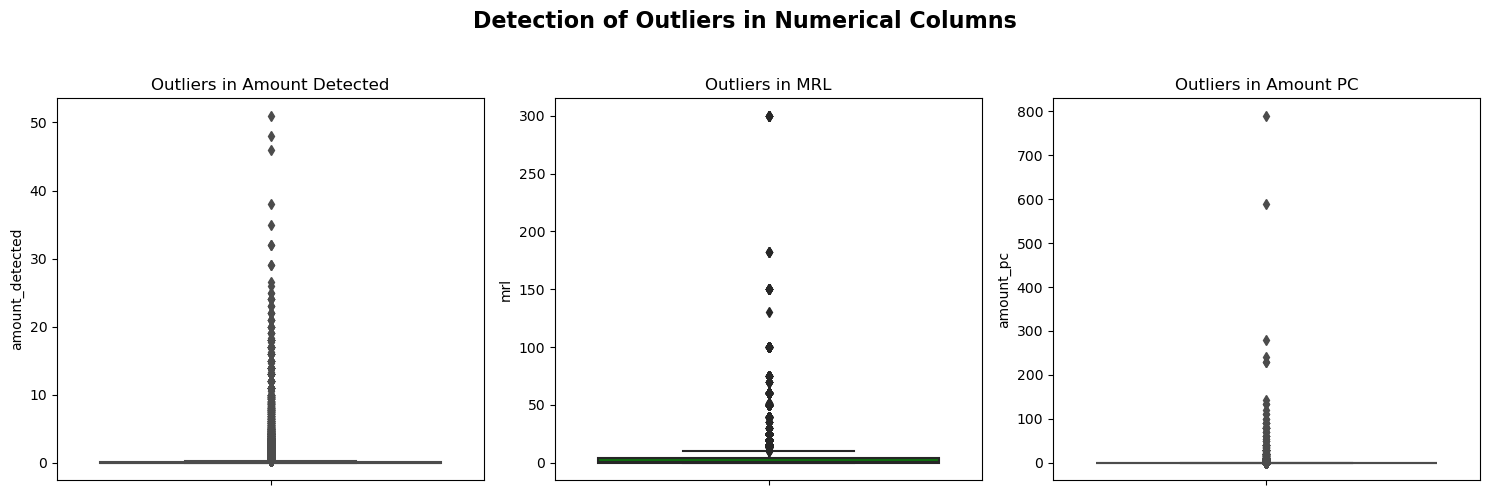

In [ ]:
plt.figure(figsize=(15, 5))
plt.suptitle("Detection of Outliers in Numerical Columns", fontsize=16, fontweight="bold")

plt.subplot(1, 3, 1)
sns.boxplot(y=data["amount_detected"], color="blue")
plt.title("Outliers in Amount Detected")

plt.subplot(1, 3, 2)
sns.boxplot(y=data["mrl"], color="green")
plt.title("Outliers in MRL")

plt.subplot(1, 3, 3)
sns.boxplot(y=data["amount_pc"], color="red")
plt.title("Outliers in Amount PC")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

we have seen some outlier in amount detected ,mrl and amount pc but these is not outlier in our data i have observed the more amount detected have also more maximun limit and so these is not outlier

## **4 Univariate Analysis**

### **4.1 Numerical Columns**  

#### **4.1.1 Distribution of amount_detected** 

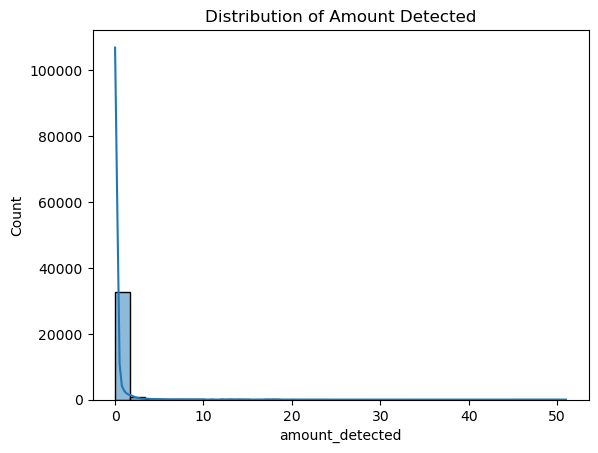

In [91]:
sns.histplot(data['amount_detected'], bins=30, kde=True)
plt.title("Distribution of Amount Detected")
plt.show()

The **amount_detected** distribution is **right-skewed**, meaning most samples have **low pesticide levels**, but a few samples have **higher amounts**

#### **4.1.2 Distribution of Maximum Residue Limit** 

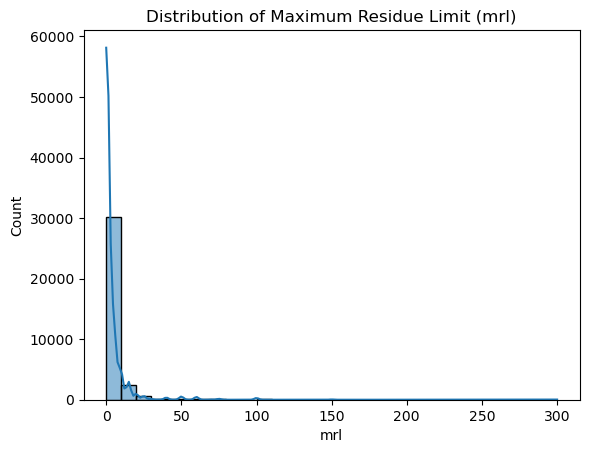

In [92]:
sns.histplot(data['mrl'], bins=30, kde=True)
plt.title("Distribution of Maximum Residue Limit (mrl)")
plt.show()

- **Most samples** have **low pesticide levels** (right-skewed distribution)

#### **4.1.3 Distribution of Amount Pc** 

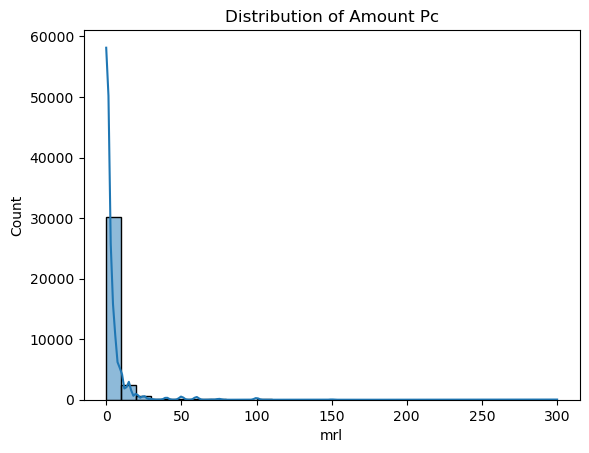

In [93]:
sns.histplot(data['mrl'], bins=30, kde=True)
plt.title("Distribution of Amount Pc")
plt.show()

- **Most pesticide levels are very low** (close to 0)    
- **The distribution is right-skewed**, meaning a few samples have high pesticide levels

### 5.2 Categorical Columns

#### **5.2.1 Countplot for country_of_origin**

In [94]:
data['country_of_origin'].nunique()

132

In our country_of_origin column 130 unique value are present so we have plot countplot on top 10 unique value 

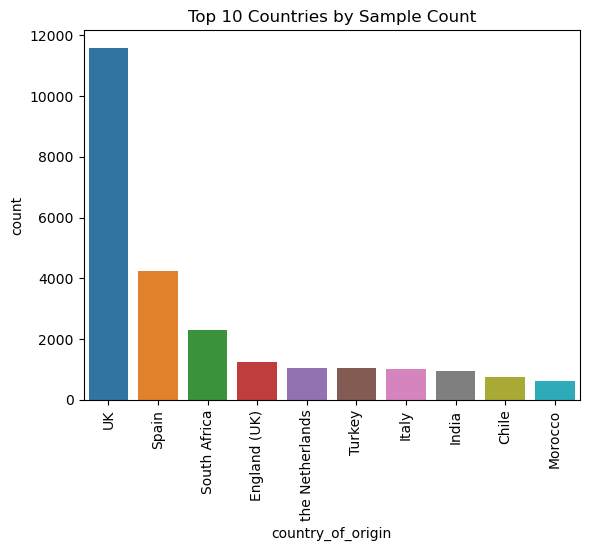

In [95]:
top_countries = data['country_of_origin'].value_counts().nlargest(10).index  
sns.countplot(x=data['country_of_origin'], order=top_countries)  
plt.xticks(rotation=90)  
plt.title("Top 10 Countries by Sample Count")  
plt.show()

- **UK has the highest number of samples** significantly more than any other country 
- **Spain is the second highest** but the sample count is much lower than the UK

#### **5.2.2 Top 10 Most Common Pesticides**

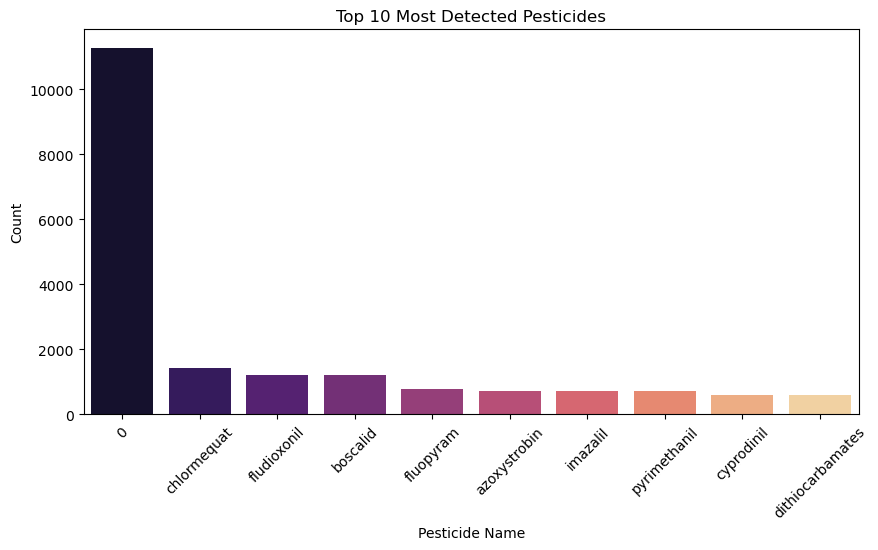

In [96]:
plt.figure(figsize=(10, 5))
top_pesticides = data["chem_name"].value_counts().head(10)
sns.barplot(x=top_pesticides.index, y=top_pesticides.values, palette="magma")
plt.title("Top 10 Most Detected Pesticides")
plt.xlabel("Pesticide Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

- The presence of 0 suggests the No Pesticides Detection in most of the sample
- Top detected Pesticide Name is **chlormequant** and **boscalid**

#### **5.2.3 Top 10 Most Common Products**

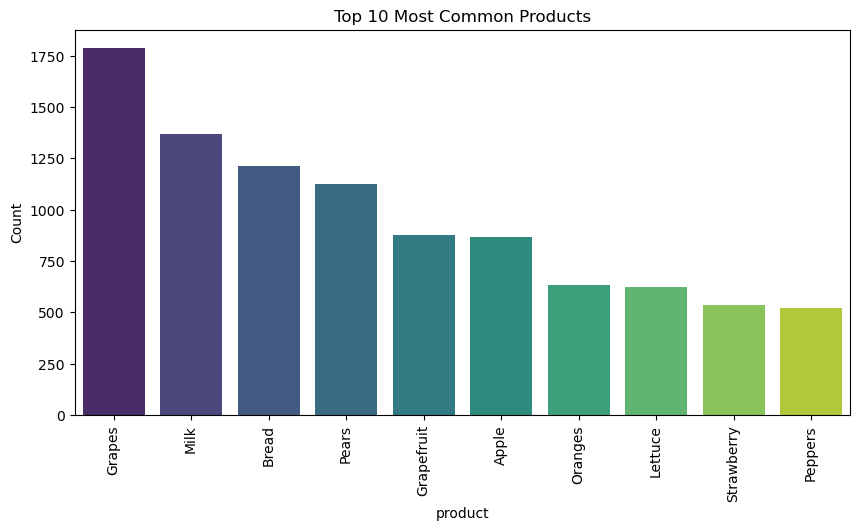

In [97]:
top_products = data['product'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 10 Most Common Products")
plt.ylabel("Count")
plt.show()

**Milk** is the most frequently tested product, followed by bread and grapes, indicating a focus on dairy and staple food monitoring

## **5. Bivariate Analysis** 

### 5.1 Categorical vs. Numerical

#### **5.1.1 Pesticide Levels by Product**

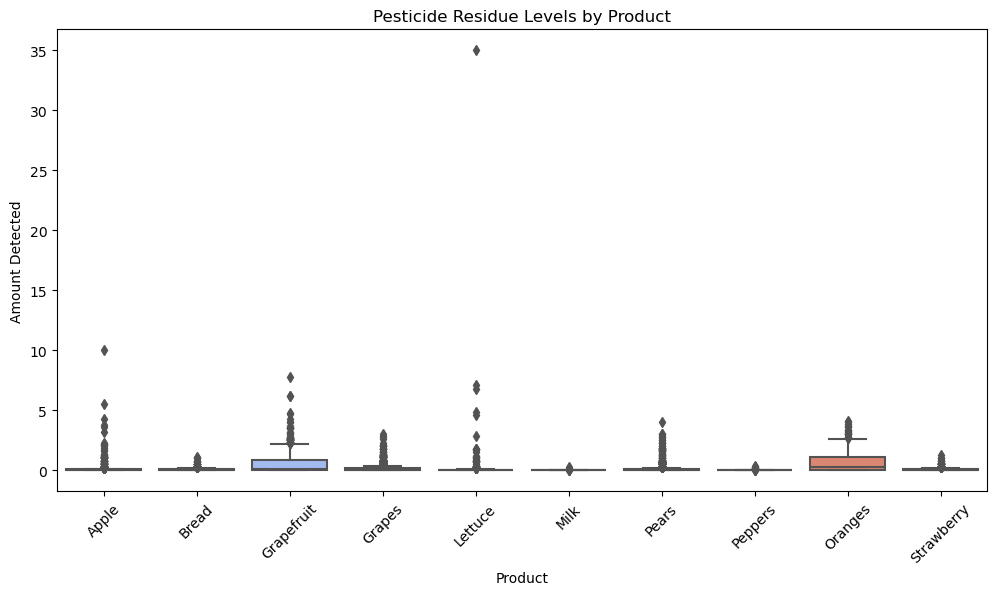

In [98]:
top_10_products = data["product"].value_counts().index[:10]
filtered_data = data[data["product"].isin(top_10_products)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="product", y="amount_detected", data=filtered_data, palette="coolwarm")
plt.title("Pesticide Residue Levels by Product")
plt.xlabel("Product")
plt.ylabel("Amount Detected")
plt.xticks(rotation=45)
plt.show()

- **Some foods like Bread, Grapes, and Apples have more pesticide residue than others.**  
- **Milk and Peppers have the least amount of pesticides.**   

#### **5.1.2 Pesticide Levels by Country**

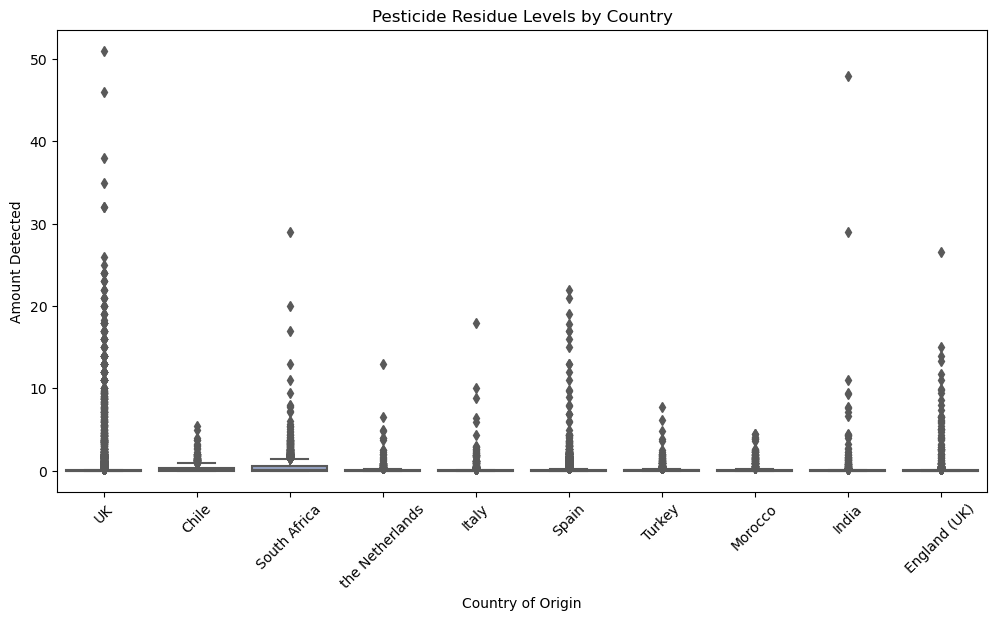

In [99]:
top_10_products = data["country_of_origin"].value_counts().index[:10]
filtered_data = data[data["country_of_origin"].isin(top_10_products)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="country_of_origin", y="amount_detected", data=filtered_data, palette="Set2")
plt.title("Pesticide Residue Levels by Country")
plt.xlabel("Country of Origin")
plt.ylabel("Amount Detected")
plt.xticks(rotation=45)
plt.show()

- **South Africa, Italy, and the Netherlands** have higher pesticide residue levels compared to other countries.  
- The **Chile and Morocco** have lower pesticide residues compared to other countries. 

### 5.2 Numerical vs. Numerical

#### **5.2.1 Pesticide Amount Detected vs MRL (Top 10 Products)**

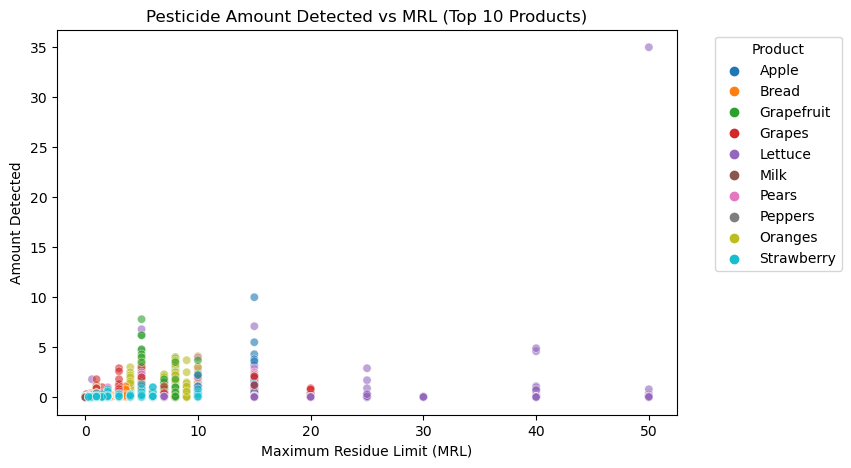

In [100]:
top_10_products = data["product"].value_counts().index[:10]
filtered_data = data[data["product"].isin(top_10_products)]
plt.figure(figsize=(8, 5))
sns.scatterplot(x=filtered_data["mrl"], y=filtered_data["amount_detected"], hue=filtered_data["product"], alpha=0.6)
plt.title("Pesticide Amount Detected vs MRL (Top 10 Products)")
plt.xlabel("Maximum Residue Limit (MRL)")
plt.ylabel("Amount Detected")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Some products like **Okra, Peppers, and Grapes** have more pesticides than the safe limit (MRL)  
- Most products have pesticide levels **within the safe limit**  

## **6. Multivariate Analysis**

#### **6.1 Time Trend of Pesticide Levels**

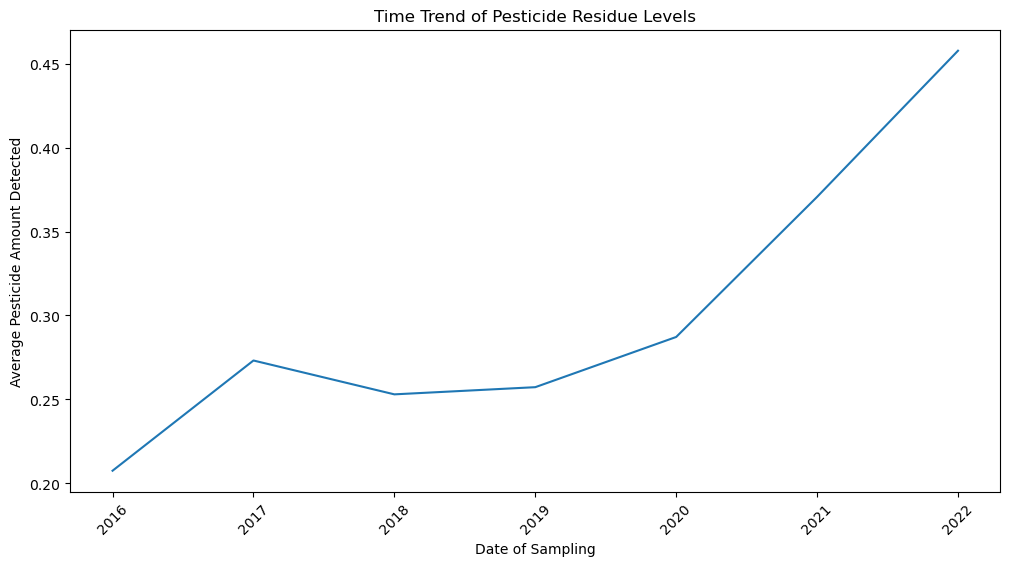

In [101]:
plt.figure(figsize=(12, 6))
data.groupby("year")["amount_detected"].mean().plot()
plt.title("Time Trend of Pesticide Residue Levels")
plt.xlabel("Date of Sampling")
plt.ylabel("Average Pesticide Amount Detected")
plt.xticks(rotation=45)
plt.show()

- After 2020, the levels started increasing
- Pesticide residue levels changed over the years, with a peak in **2022** 

####  **6.2 Pesticide Residue Levels Across Top 10 Retailers**

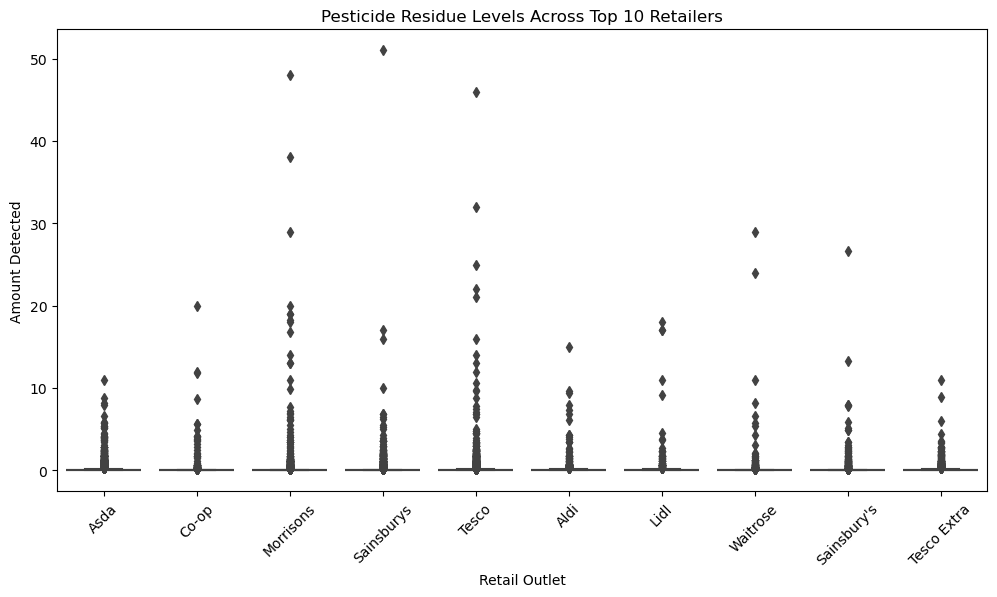

In [102]:
top_10_outlets = data["retail_outlet"].value_counts().index[:10]
filtered_data = data[data["retail_outlet"].isin(top_10_outlets)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="retail_outlet", y="amount_detected", data=filtered_data, palette="husl")
plt.title("Pesticide Residue Levels Across Top 10 Retailers")
plt.xlabel("Retail Outlet")
plt.ylabel("Amount Detected")
plt.xticks(rotation=45)
plt.show()


Pesticide levels are mostly similar across all retailers. However, some products have unusually high pesticide levels, especially in **Tesco,
Morrisons and waitrose** which show more variation.


#### **6.3 Correlation Heatmap**

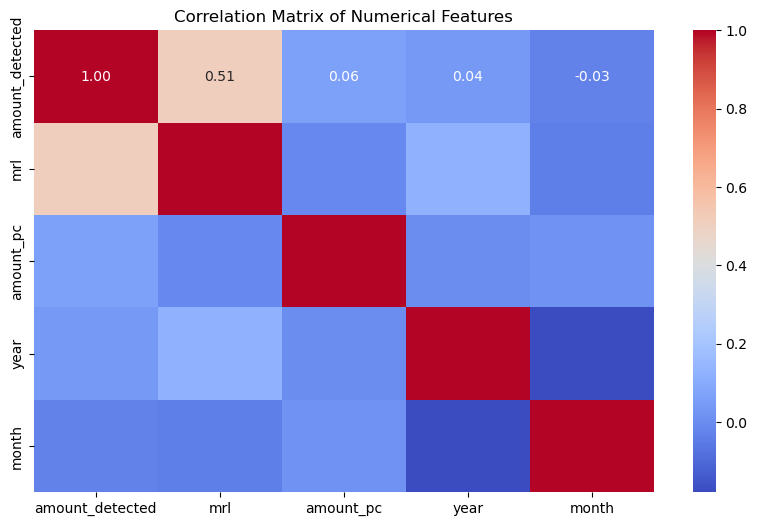

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**1. Strong Positive Correlation:**  
- amount_detected and`mrl are strongly related **0.71**, meaning more pesticide detected usually means higher residue limits
    amount_detected and amount_pc also have a strong connection (**0.77**), showing that pesticide  is linked to the amount detected  

 **2. Weak or No Correlation:**  
-  year and amount_detected have almost no relationship **-0.00**, meaning pesticide levels don’t change much over time
    month and other features show weak links, suggesting seasons don’t affect pesticide levels much 

##  Key Insights from EDA  

-  **Most food samples have low pesticide levels but a few exceed Maximum Residue Limits (MRL)**
-  **Highly skewed distribution** with most values near **zero** 
-  **Okra, Peppers, and Grapes** have the highest pesticide detection, with **Tesco** being the most frequently sampled retailer 
-  **Boscalid, pyraclostrobin, and flonicamid** are the most commonly detected pesticides some appearing more in imported products.
-  **The presence of 0 suggests the No Pesticides Detection in most of the sample**